In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df_copy = df.drop(['day','month','year'],axis=1)

In [4]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [7]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [8]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']

In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


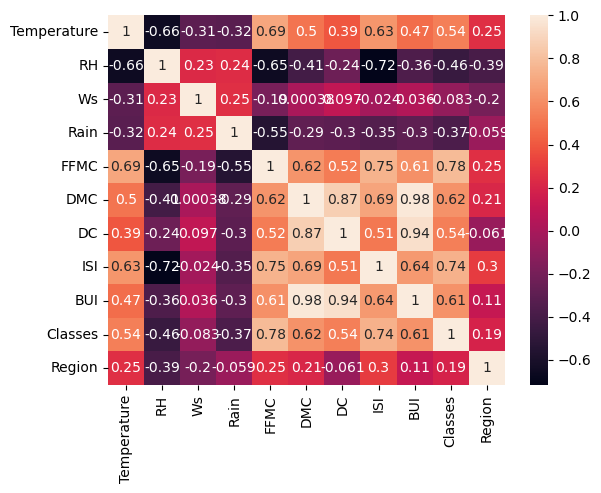

In [17]:
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [20]:
def correlation(df,threshold):
    corr_features = set()
    corr_matirx = df.corr()
    for i in range(len(corr_matirx.columns)):
        for j in range(i):
            if abs(corr_matirx.iloc[i,j] > threshold):
                colname = corr_matirx.columns[i]
                corr_features.add(colname)
    return corr_features

In [22]:
corr_features = correlation(X_train,0.85)

In [23]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [30]:
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
X_test_scaled = scaler.transform(X_test)

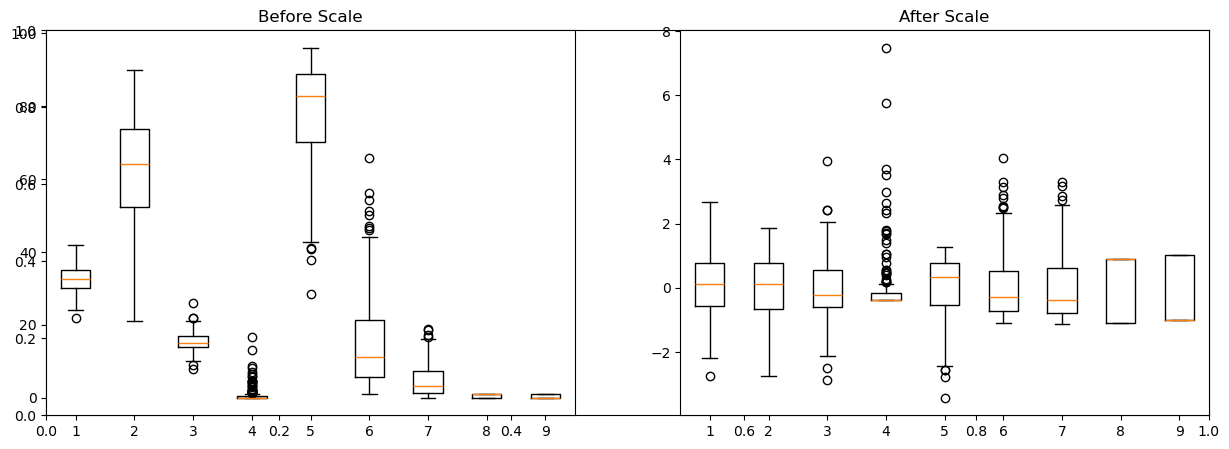

In [34]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(X_train)
plt.title('Before Scale')
plt.subplot(1,2,2)
plt.boxplot(X_train_scaled)
plt.title('After Scale')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)

mean_absolute_error : 0.5468236465249977
r2_score : 0.9847657384266952


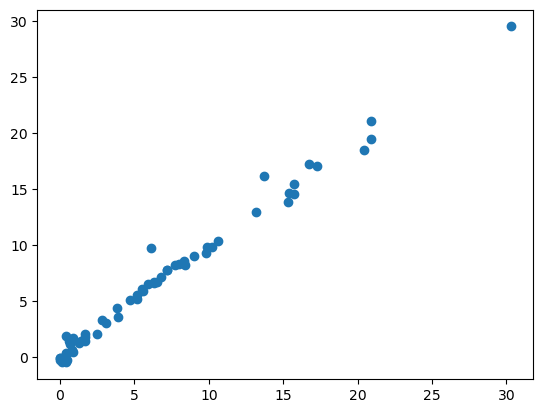

In [38]:
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 1.1331759949144087
r2_score : 0.9492020263112388


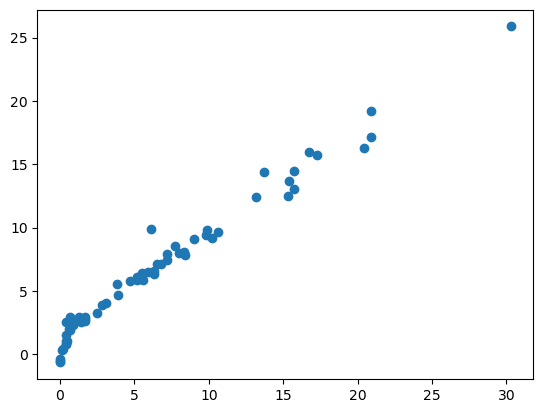

In [39]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train_scaled,y_train)
y_pred = Lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 0.6199701158263436
r2_score : 0.9820946715928274


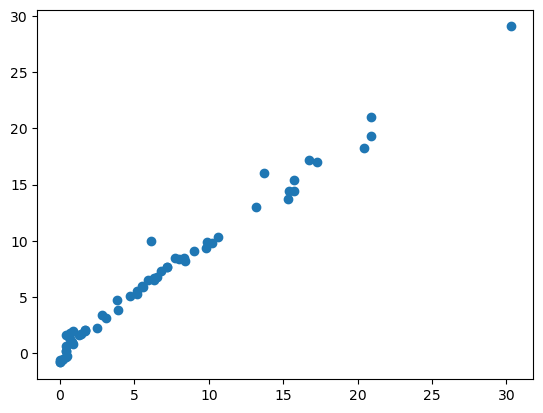

In [40]:
from sklearn.linear_model import LassoCV
LassoCV = LassoCV(cv=5)
LassoCV.fit(X_train_scaled,y_train)
y_pred = LassoCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 0.5642305340105683
r2_score : 0.9842993364555513


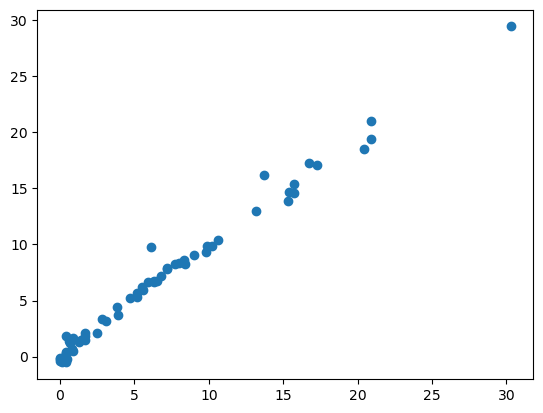

In [42]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred = Ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 0.5642305340105683
r2_score : 0.9842993364555513


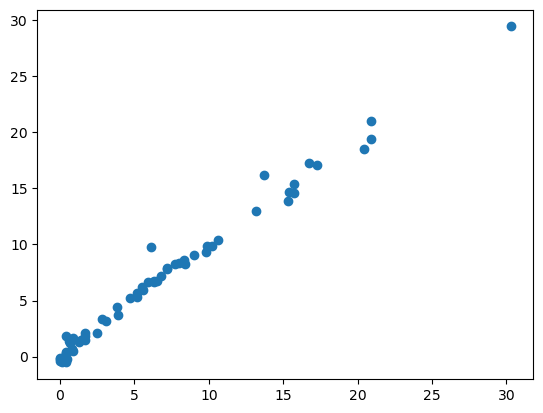

In [44]:
from sklearn.linear_model import RidgeCV
RidgeCV = RidgeCV(cv=5)
RidgeCV.fit(X_train_scaled,y_train)
y_pred = RidgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 1.8822353634896
r2_score : 0.8753460589519703


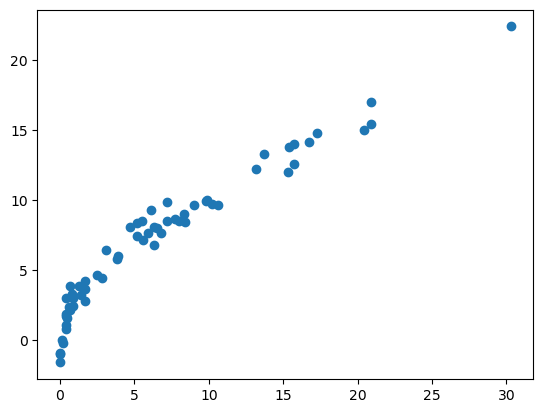

In [45]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred = ElasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error : 0.6575946731430902
r2_score : 0.9814217587854941


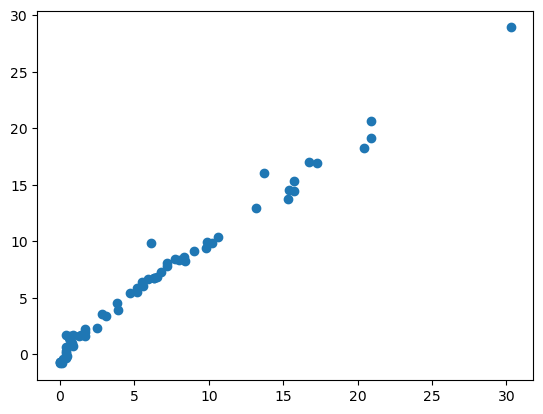

In [46]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=5)
ElasticNetCV.fit(X_train_scaled,y_train)
y_pred = ElasticNetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score_r2 = r2_score(y_test,y_pred)
print(f"mean_absolute_error : {mae}")
print(f"r2_score : {score_r2}")
plt.scatter(y_test,y_pred)
plt.show()

In [48]:
Ridge

Ridge()

In [49]:
scaler

StandardScaler()

In [50]:
import pickle as pkl

In [51]:
pkl.dump(scaler,open('scaler.pkl','wb'))
pkl.dump(Ridge,open('ridge.pkl','wb'))